In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

#import lsst.ip.diffim as ipDiffim
# I linked from ip_diffim/python/lsst/ip/diffim/imageMapReduce.py into diffimTests/imageMapReduce.py
#    (or copy it)

In [2]:
import diffimTests as dit
#reload(dit)

testObj = dit.DiffimTest(varFlux2=np.repeat(620*np.sqrt(2), 10),
                         n_sources=200, verbose=True, sourceFluxRange=(2000., 120000.), 
                         psf_yvary_factor=0., psfSize=13)
res = testObj.runTest(spatialKernelOrder=2, zogyImageSpace=False)
print res

Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0.0, 0.0]
PSF y spatial-variation: 0.0 0.0
Variable source: 5 429.930150068 45.4111877538 0 876.812408671
Variable source: 7 47.0281372458 83.6987374825 0 876.812408671
Variable source: 11 41.0344890951 414.019055818 0 876.812408671
Variable source: 3 131.083544347 80.5203306927 0 876.812408671
Variable source: 2 177.353565847 137.867862426 0 876.812408671
Variable source: 6 199.495824513 374.913115553 0 876.812408671
Variable source: 0 163.630302512 214.310623839 0 876.812408671
Variable source: 9 261.15293133 158.934365254 0 876.812408671
Variable source: 4 313.612190791 285.197720876 0 876.812408671
Variable source: 1 280.641774149 295.906549472 0 876.812408671
{'Zogy': {'FP': 2, 'FN': 5, 'TP': 5}, 'ALstack': {'FP': 5, 'FN': 4, 'TP': 6}, 'SZogy': {'FP': 1, 'FN': 4, 'TP': 6}, 'ALstack_decorr': {'FP': 2, 'FN': 6, 'TP': 4}}


In [3]:
print dit.computeClippedImageStats(testObj.im1.im)
print dit.computeClippedImageStats(testObj.im2.im)
print dit.computeClippedImageStats(testObj.S_Zogy.im)
print dit.computeClippedImageStats(testObj.S_Zogy.var)
print dit.computeClippedImageStats(testObj.S_Zogy.im / testObj.S_Zogy.var)
#dit.plotImageGrid(((testObj.S_Zogy.im / testObj.S_Zogy.var > 5.) * 10.0,), imScale=8)

stats(mean=0.53657831626475438, stdev=17.387798256376026, min=-74.0, max=5040.0)
stats(mean=0.96078638538988603, stdev=17.684144647145189, min=-74.0, max=3357.0)
stats(mean=3.8123798924116009e-06, stdev=0.00025064504833608971, min=-0.0013352511543362302, max=0.0017166393317147024)
stats(mean=0.00025378084736055417, stdev=1.2083407504822992e-06, min=0.00024826298346547986, max=0.0014281347978443144)
stats(mean=0.013761121551815733, stdev=0.97867441954516188, min=-4.8722151528184217, max=6.1182395464858201)


A&L(dec): stats(mean=0.056409959, stdev=24.17757, min=-135.2399, max=186.8837)
Zogy: stats(mean=0.018241414849035676, stdev=24.263403759272784, min=-160.35538215010945, max=156.86833529398118)
A&L(dec) - Zogy: stats(mean=0.025465714758368868, stdev=1.7787451167184696, min=-35.284493339510632, max=121.13578910201375)
A&L(dec) - A&L: stats(mean=-0.021872632, stdev=6.7160521, min=-37.531403, max=51.202789)
Scorr: stats(mean=3.8123798924116009e-06, stdev=0.00025064504833608971, min=-0.0013352511543362302, max=0.0017166393317147024)
Scorr_var: stats(mean=0.00025378084736055417, stdev=1.2083407504822992e-06, min=0.00024826298346547986, max=0.0014281347978443144)


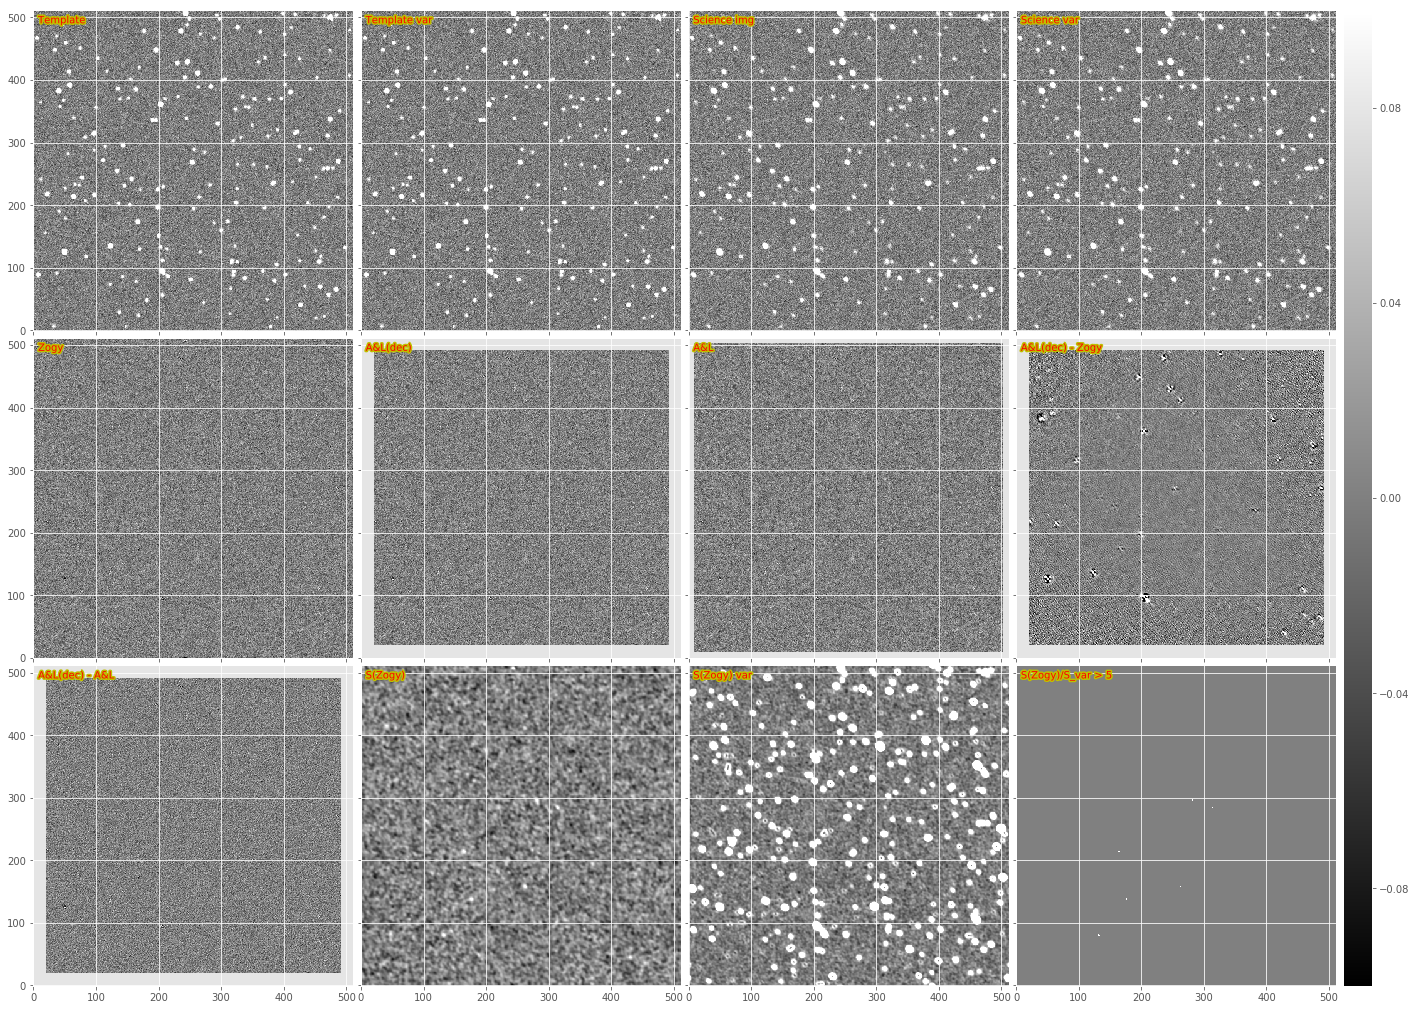

In [4]:
#dit.plotImageGrid((testObj.im1.im, testObj.im2.im), imScale=8)
testObj.doPlot(imScale=6, include_Szogy=True);

In [5]:
import diffimTests as dit

zogy = dit.zogy.Zogy(testObj.im1.im, testObj.im2.im, testObj.im1.var, testObj.im2.var, 
                     testObj.im1.psf, testObj.im2.psf, inImageSpace=True)
%timeit zogy.doZogy(computeScorr=True)
D1, D1_var, S1, S_var1, Spsf1 = zogy.D, zogy.D_var, zogy.S, zogy.S_var, zogy.Pd
print 'DONE1'

zogy = dit.zogy.Zogy(testObj.im1.im, testObj.im2.im, testObj.im1.var, testObj.im2.var, 
                     testObj.im1.psf, testObj.im2.psf, inImageSpace=False)
%timeit zogy.doZogy(computeScorr=True)
D2, D2_var, S2, S_var2, Spsf2 = zogy.D, zogy.D_var, zogy.S, zogy.S_var, zogy.Pd
print 'DONE2'

1 loop, best of 3: 849 ms per loop
DONE1
1 loop, best of 3: 342 ms per loop
DONE2


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


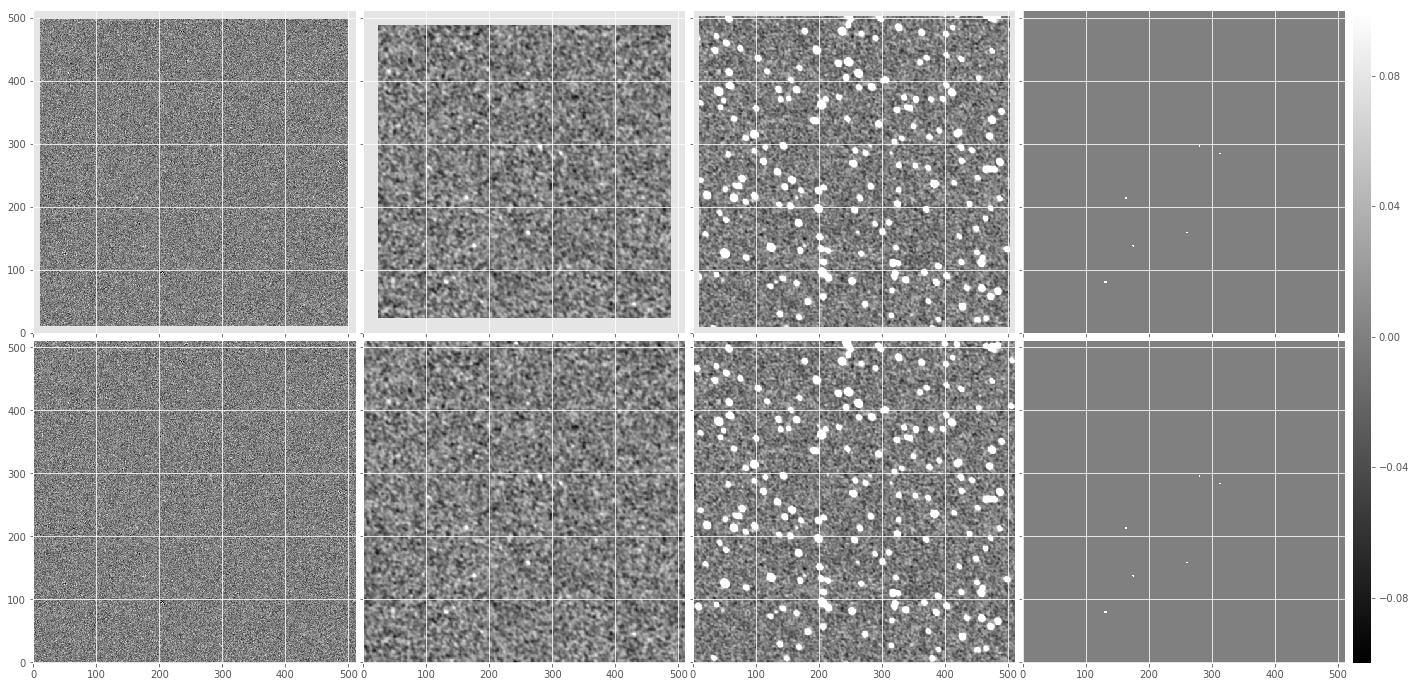

In [6]:
dit.plotImageGrid((D1, S1, S_var1, (S1/S_var1)>5.0, D2, S2, S_var2, (S2/S_var2)>5.0), imScale=6)

1 loop, best of 3: 817 ms per loop
DONE1
1 loop, best of 3: 346 ms per loop
DONE2


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater


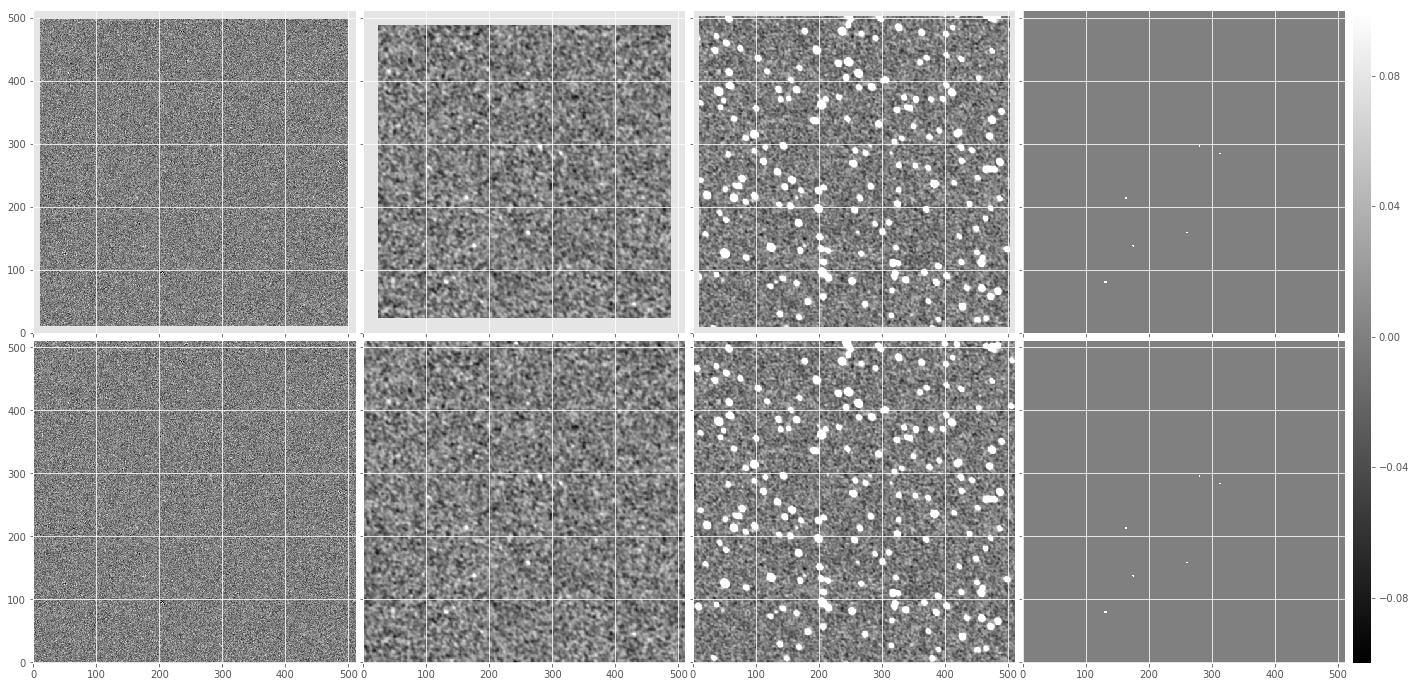

In [8]:
zogy = dit.zogy.ZogyTask(testObj.im1, testObj.im2, inImageSpace=True)
%timeit zogy.doZogy(computeScorr=True)
D1, S1 = zogy.D, zogy.S
print 'DONE1'

zogy = dit.zogy.ZogyTask(testObj.im1, testObj.im2, inImageSpace=False)
%timeit zogy.doZogy(computeScorr=True)
D2, S2 = zogy.D, zogy.S
print 'DONE2'

dit.plotImageGrid((D1.im, S1.im, S1.var, (S1.im/S1.var)>5.0, 
                   D2.im, S2.im, S2.var, (S2.im/S2.var)>5.0), imScale=6)